# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wanning
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | kristiansund
Processing Record 5 of Set 1 | aral
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | mossel bay
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | reyes
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | kendari
Processing Record 18 of Set 1 | altamira
Processing Record 19 of Set 1 | hohhot
Processing Record 20 of Set 1 | petrozavodsk
Processing Record 21 of Set 1 | enewet

Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | yabassi
Processing Record 40 of Set 4 | daru
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | la union
Processing Record 43 of Set 4 | sandwich
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | ntossoni
City not found. Skipping...
Processing Record 46 of Set 4 | dapa
Processing Record 47 of Set 4 | manggar
Processing Record 48 of Set 4 | concordia
Processing Record 49 of Set 4 | williston
Processing Record 0 of Set 5 | springbok
Processing Record 1 of Set 5 | iskateley
Processing Record 2 of Set 5 | sinabang
Processing Record 3 of Set 5 | boiling springs
Processing Record 4 of Set 5 | san andres
Processing Record 5 of Set 5 | choyr
Processing Record 6 of Set 5 | zhangye
Processing Record 7 of Set 5 | praia da vitoria
Processing Record 8 of Set 5 | at taj
Processing Record 9 of Set 5 | smirnykh
Processing Record 10 of Set 5 | muli
Processing Record 11 of Set 5 | orur

Processing Record 32 of Set 8 | alesund
Processing Record 33 of Set 8 | darwin
Processing Record 34 of Set 8 | madang
Processing Record 35 of Set 8 | guangming
Processing Record 36 of Set 8 | orsova
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | boise
Processing Record 39 of Set 8 | valparaiso
Processing Record 40 of Set 8 | island harbour
Processing Record 41 of Set 8 | motueka
Processing Record 42 of Set 8 | yangor
City not found. Skipping...
Processing Record 43 of Set 8 | duong dong
Processing Record 44 of Set 8 | zaozersk
Processing Record 45 of Set 8 | aktau
Processing Record 46 of Set 8 | holualoa
Processing Record 47 of Set 8 | labrador city
Processing Record 48 of Set 8 | hermanus
Processing Record 49 of Set 8 | waingapu
Processing Record 0 of Set 9 | hihifo
City not found. Skipping...
Processing Record 1 of Set 9 | kudat
Processing Record 2 of Set 9 | talbahat
Processing Record 3 of Set 9 | santander
Processing Record 4 of Set 9 | chibougamau
Processing 

Processing Record 21 of Set 12 | achinsk
Processing Record 22 of Set 12 | cairns city
City not found. Skipping...
Processing Record 23 of Set 12 | yarovoye
Processing Record 24 of Set 12 | dalandzadgad
Processing Record 25 of Set 12 | megion
Processing Record 26 of Set 12 | dalai
Processing Record 27 of Set 12 | fort st. john
Processing Record 28 of Set 12 | pizarro
Processing Record 29 of Set 12 | copiapo
Processing Record 30 of Set 12 | arawa
Processing Record 31 of Set 12 | ngozi
Processing Record 32 of Set 12 | ajdabiya
Processing Record 33 of Set 12 | kavieng
Processing Record 34 of Set 12 | urangan
Processing Record 35 of Set 12 | yelizovo
Processing Record 36 of Set 12 | oyama
Processing Record 37 of Set 12 | lospalos
Processing Record 38 of Set 12 | westport
Processing Record 39 of Set 12 | bodo
Processing Record 40 of Set 12 | rizhao
Processing Record 41 of Set 12 | machico
Processing Record 42 of Set 12 | avetrana
Processing Record 43 of Set 12 | takoradi
Processing Record 44

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wanning,18.8003,110.3967,27.05,77,52,5.30,CN,1691437990
1,avarua,-21.2078,-159.7750,23.03,73,81,2.57,CK,1691437842
2,invercargill,-46.4000,168.3500,4.45,87,96,3.58,NZ,1691437662
3,kristiansund,63.1115,7.7320,12.03,93,75,3.60,NO,1691438103
4,aral,40.5156,81.2636,26.99,35,100,0.36,CN,1691438158


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wanning,18.8003,110.3967,27.05,77,52,5.30,CN,1691437990
1,avarua,-21.2078,-159.7750,23.03,73,81,2.57,CK,1691437842
2,invercargill,-46.4000,168.3500,4.45,87,96,3.58,NZ,1691437662
3,kristiansund,63.1115,7.7320,12.03,93,75,3.60,NO,1691438103
4,aral,40.5156,81.2636,26.99,35,100,0.36,CN,1691438158


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

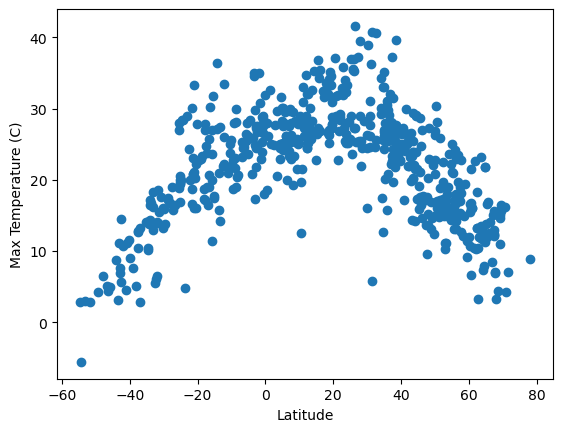

In [31]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

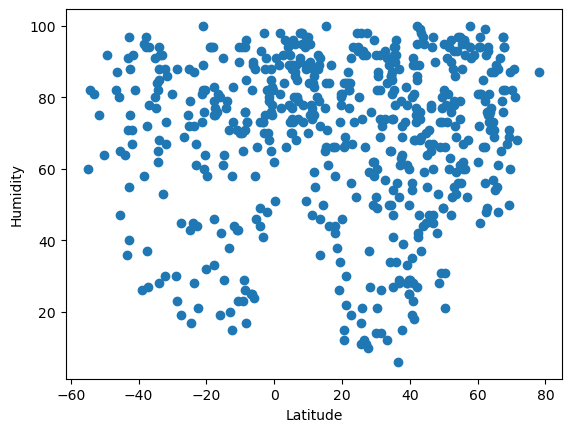

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

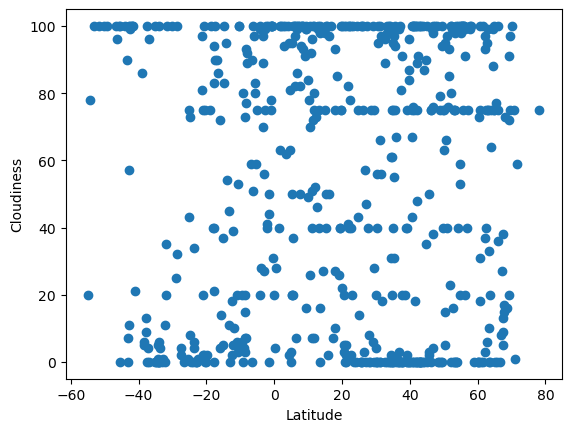

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values= city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

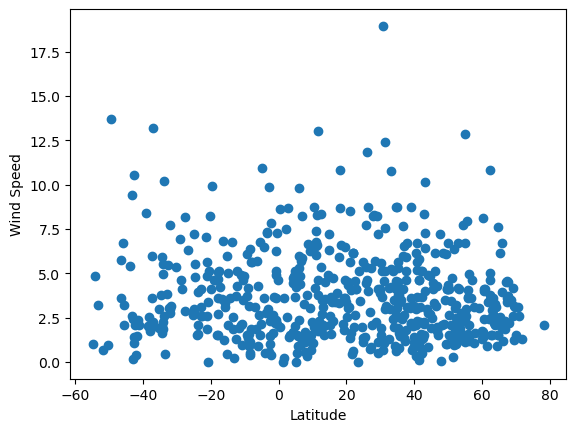

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,25.22,73,20,3.09,PT,1691437923
8,iqaluit,63.7506,-68.5145,11.85,71,20,2.06,CA,1691437665
9,lensk,60.7253,114.9278,16.03,94,31,1.49,RU,1691438077
10,medina de pomar,42.9294,-3.4880,15.32,76,0,2.24,ES,1691438077
11,tiksi,71.6872,128.8694,7.12,68,59,1.30,RU,1691437940


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.20,92,100,13.70,TF,1691437903
2,waitangi,-43.9535,-176.5597,8.79,64,100,5.43,NZ,1691437905
3,afaahiti,-17.7500,-149.2833,26.93,79,94,5.06,PF,1691437706
4,puerto baquerizo moreno,-0.9000,-89.6000,27.55,65,75,5.14,EC,1691437724
5,adamstown,-25.0660,-130.1015,20.49,72,43,3.01,PN,1691437674


###  Temperature vs. Latitude Linear Regression Plot

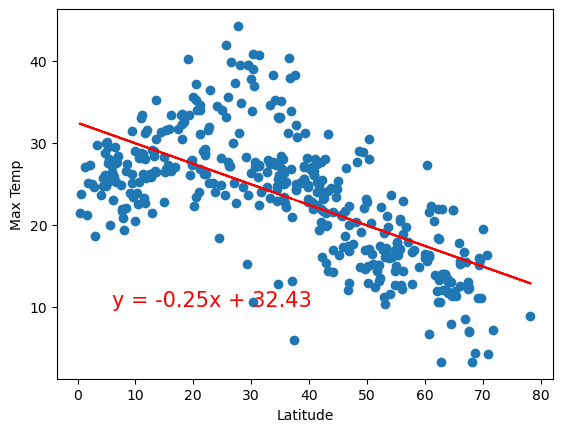

R squared: 0.4083104210736164


In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R squared: {rvalue**2}")


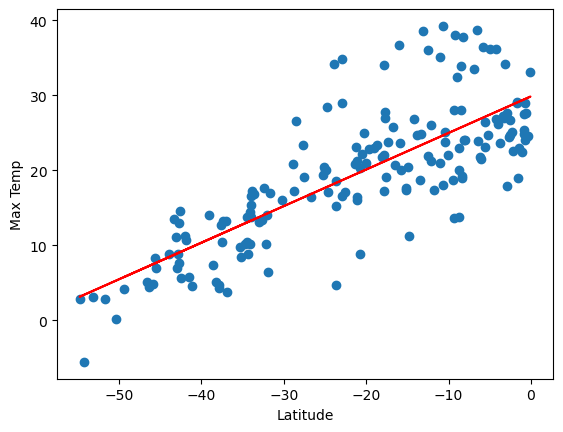

R squared: 0.615303461484323


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** It seems that there is a weak correlation between Latitude and Temperature in the Northern Hemisphere and a moderate correlation in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

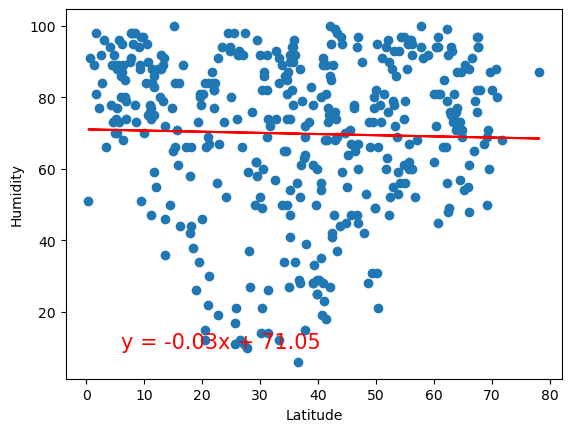

R squared: 0.0007955250804665673


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R squared: {rvalue**2}")

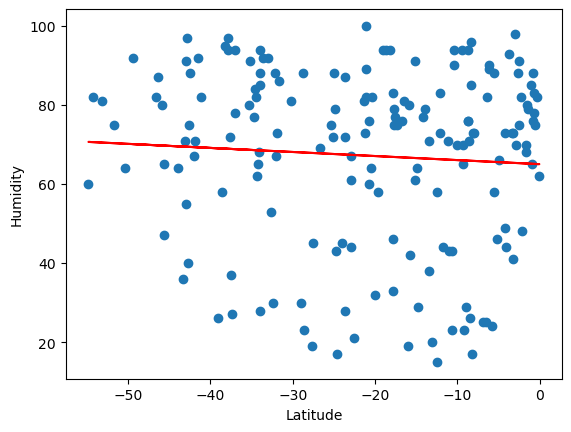

R squared: 0.004518406161884896


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R squared: {rvalue**2}")


**Discussion about the linear relationship: There is no correlation between Latitude and humidity in either Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

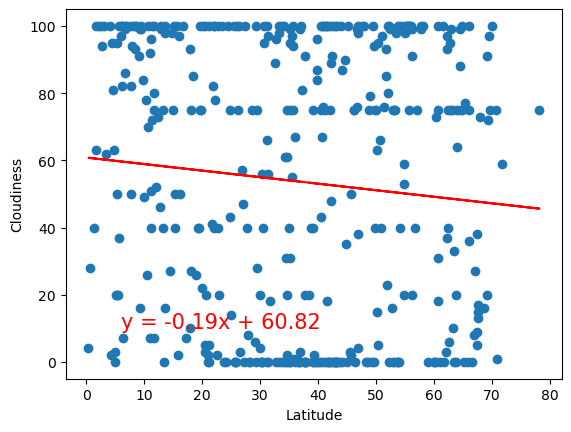

R squared: 0.008744994371025355


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R squared: {rvalue**2}")

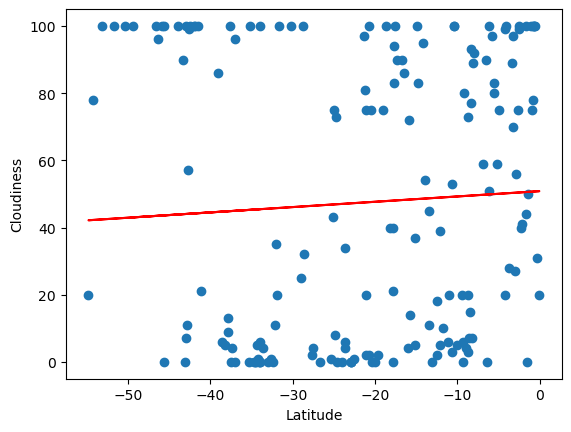

R squared: 0.003224259529391548


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R squared: {rvalue**2}")


**Discussion about the linear relationship:**There is no correlation between latitude and cloudiness in either Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

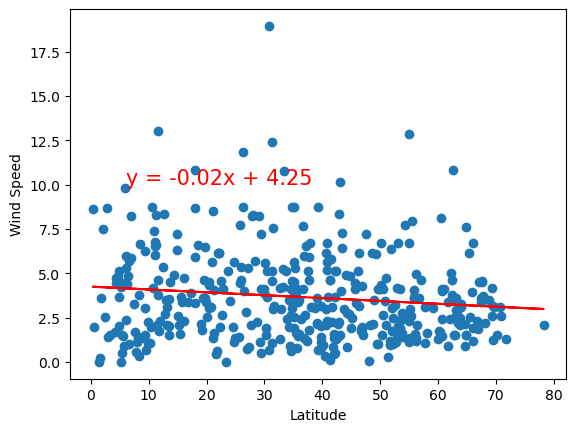

R squared: 0.01563018942659077


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R squared: {rvalue**2}")

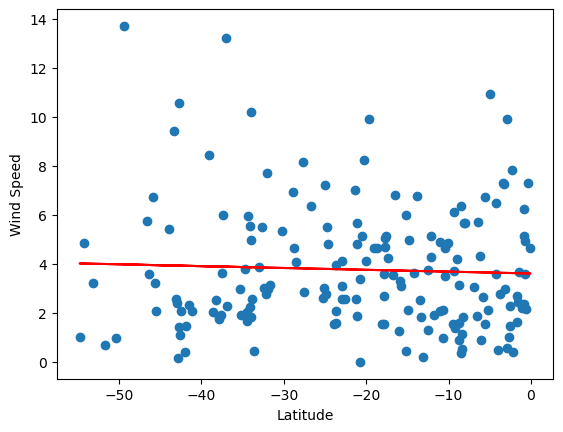

R squared: 0.0018691377373267828


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed in either Hemisphere.